In [99]:
### dr-mean (iPSCs), SNPs + STRs + SVs

In [100]:
myfolder = "/hps/nobackup/hipsci/scratch/ComparingQtlMapping/SingleCell/PseudoBulk/mean/Run_Output_PCA20_day0-PassQc_log_TPM_scater_libsize_206_exp_SV_eQTL/V1/"

In [101]:
file = paste0(myfolder, "top_qtl_results_all.txt")
df = read.csv(file, sep="\t")

In [102]:
df

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,feature_id
17_80191922_T_*,7.434754e-05,0.1523447,0.03845219,0.0995434104,17,79825597,79829282,136,78,0.74049416,3455.0905,NA,NA,1,ENSG00000141522
17_81018007_G_C,3.502918e-04,0.5511699,0.15417547,0.1054199677,17,80186273,80219005,136,78,1.04616795,365.1178,NA,NA,1,ENSG00000141526
17_80667320_T_C,7.197601e-04,0.3655577,0.10809115,0.1726687898,17,80612849,80656604,136,78,1.40039683,459.7195,NA,NA,1,ENSG00000141542
17_80369128_G_A,1.937594e-03,0.1714031,0.05529785,0.1688757989,17,80196899,80231607,136,78,0.69148990,500.4649,NA,NA,1,ENSG00000141551
17_80637244_G_A,1.358695e-03,0.1559359,0.04868001,0.8723571776,17,79848666,79858867,136,78,0.09013469,2240.4374,NA,NA,1,ENSG00000141552
17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,0.0003257323,17,80709940,80900724,136,78,0.64472853,1511.0690,NA,NA,1,ENSG00000141556
17_79691836_G_A,4.950654e-04,1.5656454,0.44945741,0.0186946357,17,80674559,80688204,136,78,0.97947822,1266.4249,NA,NA,1,ENSG00000141560
17_80371829_G_C,6.981495e-05,0.3099331,0.07793304,0.0308139888,17,80416056,80448413,136,78,0.76179653,135.4346,NA,NA,1,ENSG00000141562
17_79525948_G_C,2.927022e-03,-0.2585888,0.08691185,0.9999745839,17,80477589,80602538,136,78,0.99419094,2379.9627,NA,NA,1,ENSG00000141568
17_80993805_G_*,9.335651e-05,-0.7173864,0.18360440,0.1411151374,17,80278900,80291950,136,78,0.06952617,15501.3028,NA,NA,1,ENSG00000141574


In [103]:
df$snp_id = as.character(df$snp_id)

In [104]:
nrow(df)

[1] 49030

In [105]:
length(df$snp_id[grep("Human_STR",df$snp_id)]) # short tandem repeats (STR)
length(df$snp_id[grep("DEL",df$snp_id)]) # deletions
length(df$snp_id[grep("CNV",df$snp_id)]) # copy number variation (CNV)

[1] 2663

[1] 48

[1] 188

In [106]:
for (snp_id in df$snp_id){
    print(snp_id)}

[1] "17_80191922_T_*"
[1] "17_81018007_G_C"
[1] "17_80667320_T_C"
[1] "17_80369128_G_A"
[1] "17_80637244_G_A"
[1] "17_80681175_A_G"
[1] "17_79691836_G_A"
[1] "17_80371829_G_C"
[1] "17_79525948_G_C"
[1] "17_80993805_G_*"
[1] "17_80927835_T_C"
[1] "17_81180151_A_G"
[1] "17_79945849_T_C"
[1] "17_79704466_G_C"
[1] "17_80246027_AGAGGAGAGGCCACGTGAGCACGCAGGGAGAGGCCACATGAGGACACAGGGAAAGGTCATGTGAGGACGCAGG_AGAGAGGCCACGTG"
[1] "17_79692763_C_CTTTT"
[1] "17_80057975_C_T"
[1] "17_79515509_A_G"
[1] "17_80043044_C_G"
[1] "17_79612541_G_A"
[1] "17_80472214_A_T"
[1] "17_79327979_A_T"
[1] "17_80466609_C_T"
[1] "17_80020025_A_C"
[1] "17_80977516_C_T"
[1] "17_80928677_T_C"
[1] "17_81059170_T_C"
[1] "17_81046464_C_T"
[1] "17_80373377_G_T"
[1] "17_79984440_T_TTGTGTGTGTGTG"
[1] "17_80563659_T_C"
[1] "17_79485372_TGCCCCTGTACCTGGCATA_TGCCCCTGTACCTGGCATAGCCCCTGTACCTGGCATA"
[1] "Human_STR_613641"
[1] "17_78798133_A_G"
[1] "17_79500440_C_T"
[1] "17_78885858_C_A"
[1] "17_79761511_C_G"
[1] "17_79468008_C_CA"
[1] "17

In [107]:
snp_chr = c()
snp_pos = c()
snp_ref = c()
snp_alt = c()
for (snp_id in df$snp_id){
#     print(snp_id)
    if (length(grep("STR",snp_id))>0 | length(grep("DEL",snp_id))>0 | length(grep("CNV",snp_id))>0 | 
        length(grep("rMEI",snp_id))>0 | length(grep("BND",snp_id))>0 | length(grep("ALU",snp_id))>0 |
       length(grep("DUP",snp_id))>0){
        chr = pos = ref = alt = "-"
    }
    else {
        line = unlist(strsplit(as.character(snp_id),"_"))
        chr = line[1]
        pos = line[2]
        ref = line[3]
        alt = line[4]
        }
    snp_chr = c(snp_chr, chr)
    snp_pos = c(snp_pos, pos)
    snp_ref = c(snp_ref, ref)
    snp_alt = c(snp_alt, alt)
}

In [108]:
df$snp_chr = snp_chr
df$snp_pos = snp_pos
df$snp_ref = snp_ref
df$snp_alt = snp_alt
head(df,140)

snp_id,p_value,beta,beta_se,empirical_feature_p_value,feature_chromosome,feature_start,feature_end,n_samples,n_e_samples,alpha_param,beta_param,snp_chromosome,snp_position,call_rate,feature_id,snp_chr,snp_pos,snp_ref,snp_alt
17_80191922_T_*,7.434754e-05,0.1523447,0.03845219,0.0995434104,17,79825597,79829282,136,78,0.74049416,3455.0905,NA,NA,1,ENSG00000141522,17,80191922,T,*
17_81018007_G_C,3.502918e-04,0.5511699,0.15417547,0.1054199677,17,80186273,80219005,136,78,1.04616795,365.1178,NA,NA,1,ENSG00000141526,17,81018007,G,C
17_80667320_T_C,7.197601e-04,0.3655577,0.10809115,0.1726687898,17,80612849,80656604,136,78,1.40039683,459.7195,NA,NA,1,ENSG00000141542,17,80667320,T,C
17_80369128_G_A,1.937594e-03,0.1714031,0.05529785,0.1688757989,17,80196899,80231607,136,78,0.69148990,500.4649,NA,NA,1,ENSG00000141551,17,80369128,G,A
17_80637244_G_A,1.358695e-03,0.1559359,0.04868001,0.8723571776,17,79848666,79858867,136,78,0.09013469,2240.4374,NA,NA,1,ENSG00000141552,17,80637244,G,A
17_80681175_A_G,1.161181e-06,0.4515647,0.09287348,0.0003257323,17,80709940,80900724,136,78,0.64472853,1511.0690,NA,NA,1,ENSG00000141556,17,80681175,A,G
17_79691836_G_A,4.950654e-04,1.5656454,0.44945741,0.0186946357,17,80674559,80688204,136,78,0.97947822,1266.4249,NA,NA,1,ENSG00000141560,17,79691836,G,A
17_80371829_G_C,6.981495e-05,0.3099331,0.07793304,0.0308139888,17,80416056,80448413,136,78,0.76179653,135.4346,NA,NA,1,ENSG00000141562,17,80371829,G,C
17_79525948_G_C,2.927022e-03,-0.2585888,0.08691185,0.9999745839,17,80477589,80602538,136,78,0.99419094,2379.9627,NA,NA,1,ENSG00000141568,17,79525948,G,C
17_80993805_G_*,9.335651e-05,-0.7173864,0.18360440,0.1411151374,17,80278900,80291950,136,78,0.06952617,15501.3028,NA,NA,1,ENSG00000141574,17,80993805,G,*


In [109]:
c(nrow(df[nchar(df$snp_alt) > nchar(df$snp_ref),]),
  nrow(df[nchar(df$snp_alt) < nchar(df$snp_ref),]),
  nrow(df[nchar(df$snp_alt) == nchar(df$snp_ref),]))
nrow(df[nchar(df$snp_alt) >= nchar(df$snp_ref),]) + nrow(df[nchar(df$snp_alt) < nchar(df$snp_ref),]) + nrow(df[nchar(df$snp_alt) == nchar(df$snp_ref),])
nrow(df)

[1]  9822 10901 28449

[1] 77550

[1] 49030

In [110]:
snp_ids0 = df[nchar(df$snp_alt) > nchar(df$snp_ref),"snp_id"]
snp_ids1 = df[nchar(df$snp_alt) < nchar(df$snp_ref),"snp_id"]
snp_ids2 = df[nchar(df$snp_alt) == nchar(df$snp_ref),"snp_id"]

In [111]:
snp_ids0[snp_ids0 %in% snp_ids1]
snp_ids0[snp_ids0 %in% snp_ids2]
snp_ids1[snp_ids1 %in% snp_ids2]

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[26] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA
[51] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

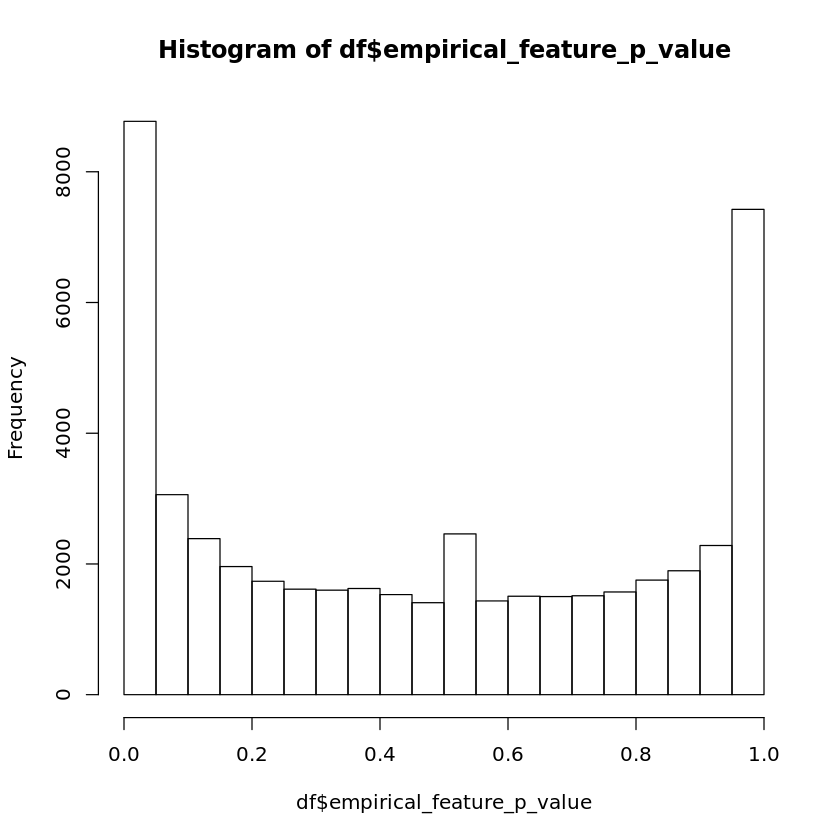

In [8]:
hist(df$empirical_feature_p_value)

In [13]:
# annotation file
anno_filename = "/hps/nobackup/hipsci/scratch/trans_eqtls/QTL_Mapping/snakemake/GeneLevel_Cis_WGS/Genotypes_V2/info_pass_nnref1_rna_398.tsv"

In [112]:
df_anno = read.csv(anno_filename, sep = "\t")
df_anno

ID,NONREF_AF_hipsci,ALLELES_DIST_hipsci,NNREF_hipsci,MAF_hipsci,MODE_hipsci,NONREF_AF_ipscore,ALLELES_DIST_ipscore,NNREF_ipscore,MAF_ipscore,...,bin_log10_SVLEN,bin_log10_SVLEN_capped,bin_log10_SVLEN_DS_RANGE,bin_log10_SVLEN_DS_RANGE_capped,super_category,genes_affected,num_genes_affected,start_variant,end_variant,ucsc_coords
CNV_1_55175_56534_HipSci,0.76063830,"1:82,0:48,3:11,2:45,4:2",143,0.56382979,1,0.776190476,"1:90,0:45,3:20,2:47,5:3,4:5",163,0.571428571,...,3.2,3.2,4.0,4.0,intergenic,,0,55175,56534,chr1:55175-56534
CNV_1_55175_56686_iPSCORE,0.76063830,"1:82,0:48,3:12,2:45,4:1",143,0.56382979,1,0.780952381,"1:90,0:45,3:20,2:46,5:3,4:6",164,0.571428571,...,3.2,3.2,4.0,4.0,intergenic,,0,55175,56686,chr1:55175-56686
CNV_1_84505_86406_HipSci,0.74468085,"1:79,0:40,3:21,2:48",140,0.57978723,1,0.676190476,"1:68,0:39,3:22,2:68,5:1,4:12",142,0.676190476,...,3.4,3.4,4.0,4.0,intergenic,,0,84505,86406,chr1:84505-86406
CNV_1_85058_87006_HipSci,0.76063830,"1:81,0:40,3:21,2:45,4:1",143,0.56914894,1,0.680952381,"1:69,0:39,3:21,2:67,4:14",143,0.671428571,...,3.4,3.4,4.0,4.0,intergenic,,0,85058,87006,chr1:85058-87006
CNV_1_85391_86406_iPSCORE,0.75531915,"1:80,0:40,3:22,2:46",142,0.57446809,1,0.695238095,"1:68,0:39,3:24,2:64,5:1,4:14",146,0.676190476,...,3.2,3.2,3.8,3.8,intergenic,,0,85391,86406,chr1:85391-86406
CNV_1_86406_89953_HipSci,0.77127660,"1:83,0:47,3:14,2:43,4:1",145,0.55851064,1,0.771428571,"1:90,0:44,3:23,2:48,5:1,4:4",162,0.571428571,...,3.6,3.6,4.4,4.4,intersects_exon,"ENSG00000238009,ENSG00000239945",2,86406,89953,chr1:86406-89953
CNV_1_86406_91299_iPSCORE,0.76595745,"1:83,0:47,3:13,2:44,4:1",144,0.55851064,1,0.766666667,"1:90,0:44,3:22,2:49,4:5",161,0.571428571,...,3.8,3.8,4.4,4.4,contains_gene,"ENSG00000238009,ENSG00000239945",2,86406,91299,chr1:86406-91299
CNV_1_564439_567804_iPSCORE,0.45212766,"12:1,1:39,0:2,3:31,2:103,5:1,4:3,7:6,9:1,8:1",85,0.45212766,2,0.552380952,"11:1,15:1,1:50,0:7,3:33,2:94,5:8,4:13,6:3",116,0.552380952,...,3.6,3.6,4.8,4.8,contains_gene,"ENSG00000198744,ENSG00000223659,ENSG00000225630,ENSG00000225972,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",9,564439,567804,chr1:564439-567804
CNV_1_565396_567497_iPSCORE,0.44680851,"1:41,0:3,3:33,2:104,5:2,4:5",84,0.44680851,2,0.557142857,"1:51,0:9,3:41,2:93,4:16",117,0.557142857,...,3.4,3.4,4.2,4.2,intersects_exon,"ENSG00000223659,ENSG00000225630,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",7,565396,567497,chr1:565396-567497
CNV_1_565396_567904_HipSci,0.44680851,"1:41,0:3,3:34,2:104,5:1,4:5",84,0.44680851,2,0.557142857,"16:1,18:1,1:50,0:8,3:41,2:93,5:1,4:13,7:2",117,0.557142857,...,3.4,3.4,4.8,4.8,intersects_exon,"ENSG00000198744,ENSG00000223659,ENSG00000225630,ENSG00000229344,ENSG00000230021,ENSG00000237973,ENSG00000240409,ENSG00000248527",8,565396,567904,chr1:565396-567904


In [114]:
ids1 = df$snp_id
ids2 = df_anno$ID
length(ids1)
length(ids2)
length(ids1[ids1 %in% ids2])

[1] 49030

[1] 651689

[1] 2960

In [15]:
colnames(df_anno)

[1] "ID"                              "NONREF_AF_hipsci"               
 [3] "ALLELES_DIST_hipsci"             "NNREF_hipsci"                   
 [5] "MAF_hipsci"                      "MODE_hipsci"                    
 [7] "NONREF_AF_ipscore"               "ALLELES_DIST_ipscore"           
 [9] "NNREF_ipscore"                   "MAF_ipscore"                    
[11] "MODE_ipscore"                    "CHROM"                          
[13] "POS"                             "CALLER"                         
[15] "NONREF_AF_all_rna"               "ALLELES_DIST_all_rna"           
[17] "NNREF_all_rna"                   "SVTYPE"                         
[19] "FILTER"                          "MAF_all_rna"                    
[21] "MODE_all_rna"                    "NONREF_AF_consented"            
[23] "ALLELES_DIST_consented"          "NNREF_consented"                
[25] "MAF_consented"                   "MODE_consented"                 
[27] "num_passing_hipsci"              "num_missing_hipsci"             
[29] "percent_passing_hipsci"          "num_passing_ipscore"            
[31] "num_missing_ipscore"             "percent_passing_ipscore"        
[33] "num_passing_all_rna"             "num_missing_all_rna"            
[35] "percent_passing_all_rna"         "num_passing_consented"          
[37] "num_missing_consented"           "percent_passing_consented"      
[39] "END"                             "ALLELES_DIST_DICT_all_rna"      
[41] "ALLELES_all_rna"                 "MIN_ALLELE_all_rna"             
[43] "MAX_ALLELE_all_rna"              "SUBTYPE_all_rna"                
[45] "ALLELES_DIST_DICT_consented"     "ALLELES_consented"              
[47] "MIN_ALLELE_consented"            "MAX_ALLELE_consented"           
[49] "SUBTYPE_consented"               "SVTYPE_all_rna"                 
[51] "SVTYPE_consented"                "ID.1"                           
[53] "NR_ID"                           "SVTYPE_NR"                      
[55] "ALLELES_DIST_DICT_ipscore"       "ALLELES_DIST_DICT_hipsci"       
[57] "NMODE_all_rna"                   "NMODE_AF_all_rna"               
[59] "NMODE_consented"                 "NMODE_AF_consented"             
[61] "NMODE_ipscore"                   "NMODE_AF_ipscore"               
[63] "NMODE_hipsci"                    "NMODE_AF_hipsci"                
[65] "SVLEN"                           "MAX_ALLELE_CHANGE"              
[67] "ALLELE_DIFF"                     "SVLEN_DS_RANGE"                 
[69] "MHC"                             "VDJ"                            
[71] "centromere"                      "seg_dupe"                       
[73] "pseudo_auto"                     "is_SVLEN"                       
[75] "log10_SVLEN"                     "log10_SVLEN_DS_RANGE"           
[77] "bin_log10_SVLEN"                 "bin_log10_SVLEN_capped"         
[79] "bin_log10_SVLEN_DS_RANGE"        "bin_log10_SVLEN_DS_RANGE_capped"
[81] "super_category"                  "genes_affected"                 
[83] "num_genes_affected"              "start_variant"                  
[85] "end_variant"                     "ucsc_coords"

In [17]:
unique(df_anno$SVTYPE_all_rna)

[1] mCNV  BND   DUP   STR   DEL   rMEI  SVA   ALU   INV   LINE1
Levels: ALU BND DEL DUP INV LINE1 mCNV rMEI STR SVA